<a href="https://colab.research.google.com/github/MukRodrigues/Projetos-Python/blob/main/An%C3%A1lise_equilibrio_phillips1996.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de estabilidade do modelo de Phillips (1996)

$$
\begin{cases}
R' = \Gamma \cdot \tau - \mu\cdot R - \beta \cdot V \cdot R \\
    L' = p \cdot \beta \cdot V \cdot R - \mu \cdot L - \alpha \cdot L\\
    E' = (1-p) \cdot \beta \cdot V \cdot R + \alpha \cdot L - \delta \cdot E\\
    V' = \pi \cdot E - \sigma \cdot V
\end{cases}
$$

### 1. Ausência de doença

O ponto de equilíbrio é:
$$
\bar{R} = \dfrac{\Gamma \tau}{\mu}, \bar{L} = \bar{E} = \bar{V} = 0.
$$

In [15]:
import sympy as sp

def analisar_estabilidade(Gamma, tau, mu, beta, p, alpha, delta, pi, sigma):
    # Variáveis simbólicas
    R, L, E, V = sp.symbols('R L E V')

    # Equações do modelo
    dR = Gamma * tau - mu*R - beta*V*R
    dL = p*beta*V*R - mu*L - alpha*L
    dE = (1-p)*beta*V*R + alpha*L - delta*E
    dV = pi*E - sigma*V

    # Vetor de variáveis e funções
    Y = sp.Matrix([R, L, E, V])
    F = sp.Matrix([dR, dL, dE, dV])

    # Jacobiano geral
    J = F.jacobian(Y)

    # Ponto de equilíbrio livre de infecção
    R_star = Gamma * tau / mu
    subs_eq = {R: R_star, L: 0, E: 0, V: 0}

    # Jacobiano no equilíbrio
    J_star = J.subs(subs_eq)

    # Autovalores numéricos
    eigenvals = [complex(ev.evalf()) for ev in J_star.eigenvals().keys()]

    # Verificar estabilidade
    estabilidade = all(ev.real < 0 for ev in eigenvals)

    print("Jacobiano no equilíbrio:\n", sp.N(J_star))
    print("\nAutovalores:")
    for ev in eigenvals:
        print(f"  {ev:.4f}")

    if estabilidade:
        print("\n✅ O equilíbrio é ESTÁVEL (todas as partes reais < 0).")
    else:
        print("\n⚠️ O equilíbrio é INSTÁVEL (alguma parte real > 0).")

    return eigenvals, estabilidade

# ============================
# Exemplo de uso
# ============================
params = {
    'Gamma': 10,
    'tau': 1,
    'mu': 0.5,
    'beta': 0.001,
    'p': 0.3,
    'alpha': 0.2,
    'delta': 0.4,
    'pi': 100,
    'sigma': 2
}

analisar_estabilidade(**params)


Jacobiano no equilíbrio:
 Matrix([[-0.500000000000000, 0, 0, -0.0200000000000000], [0, -0.700000000000000, 0, 0.00600000000000000], [0, 0.200000000000000, -0.400000000000000, 0.0140000000000000], [0, 0, 100.000000000000, -2.00000000000000]])

Autovalores:
  -0.5000+0.0000j
  0.2709+0.0000j
  -0.7648+0.0000j
  -2.6061+0.0000j

⚠️ O equilíbrio é INSTÁVEL (alguma parte real > 0).


([(-0.5+0j),
  (0.27091624340769727+0j),
  (-0.7648425045696045+0j),
  (-2.606073738838093+0j)],
 False)

### 2. Equilíbrio endêmico (incidência da doença de forma constante):

O ponto de equilíbrio endêmico é dado por
$$
\bar{R} = \dfrac{\Gamma \tau \alpha }{\mu \alpha + \beta \pi \bar{E}},  \quad \bar{L} = \dfrac{p \beta \pi \gamma \tau \bar{E}}{ (\mu \alpha + \beta \pi \bar{E}  )(\mu + \alpha   )  },  \quad  \bar{V} = \dfrac{\pi \bar{E}}{\alpha}
$$
onde
$$
\bar{E} = \dfrac{(1-p)\Gamma   \tau}{\delta} + \dfrac{\alpha   p    \Gamma \ \tau}{ \delta(\mu + \alpha)}  - \dfrac{\mu \alpha}{ \beta \pi}.
$$




In [16]:
import sympy as sp

def analisar_estabilidade(Gamma, tau, mu, beta, p, alpha, delta, pi, sigma):
    # Variáveis simbólicas
    R, L, E, V = sp.symbols('R L E V')

    # Equações do modelo
    dR = Gamma * tau - mu*R - beta*V*R
    dL = p*beta*V*R - mu*L - alpha*L
    dE = (1-p)*beta*V*R + alpha*L - delta*E
    dV = pi*E - sigma*V

    # Vetor de variáveis e funções
    Y = sp.Matrix([R, L, E, V])
    F = sp.Matrix([dR, dL, dE, dV])

    # Jacobiano geral
    J = F.jacobian(Y)

    # Ponto de equilíbrio endemico
    E_star = (1-p)*Gamma * tau / delta + alpha * p * Gamma * tau / delta*(mu + alpha)  - mu*alpha / beta*pi
    R_star =   Gamma * tau * alpha / (mu*alpha + beta * pi *E_star  )
    L_star =  p*beta * pi * Gamma * tau * E_star / (mu*alpha +beta * pi  * E_star )*(mu + alpha)
    V_star =  pi*E_star / alpha
    subs_eq = {R: R_star, L: L_star, E: E_star, V: V_star}

    # Jacobiano no equilíbrio
    J_star = J.subs(subs_eq)

    # Autovalores numéricos
    eigenvals = [complex(ev.evalf()) for ev in J_star.eigenvals().keys()]

    # Verificar estabilidade
    estabilidade = all(ev.real < 0 for ev in eigenvals)

    print("Jacobiano no equilíbrio:\n", sp.N(J_star))
    print("\nAutovalores:")
    for ev in eigenvals:
        print(f"  {ev:.4f}")

    if estabilidade:
        print("\n✅ O equilíbrio é ESTÁVEL (todas as partes reais < 0).")
    else:
        print("\n⚠️ O equilíbrio é INSTÁVEL (alguma parte real > 0).")

    return eigenvals, estabilidade

# ============================
# Exemplo de uso
# ============================
params = {
    'Gamma': 1,
    'tau': 1,
    'mu': 0.5,
    'beta': 0.001,
    'p': 0.3,
    'alpha': 0.2,
    'delta': 0.4,
    'pi': 1,
    'sigma': 2
}

analisar_estabilidade(**params)


Jacobiano no equilíbrio:
 Matrix([[-0.00927500000000003, 0, 0, -0.107816711590296], [-0.147217500000000, -0.700000000000000, 0, 0.0323450134770888], [-0.343507500000000, 0.200000000000000, -0.400000000000000, 0.0754716981132072], [0, 0, 1.00000000000000, -2.00000000000000]])

Autovalores:
  0.0413+0.0000j
  -0.4133+0.0000j
  -0.7046+0.0000j
  -2.0328+0.0000j

⚠️ O equilíbrio é INSTÁVEL (alguma parte real > 0).


([(0.04131819580107489+0j),
  (-0.41326454637818827+0j),
  (-0.7045669765092666+0j),
  (-2.03276167291362+0j)],
 False)

## Gráfico do Sistema



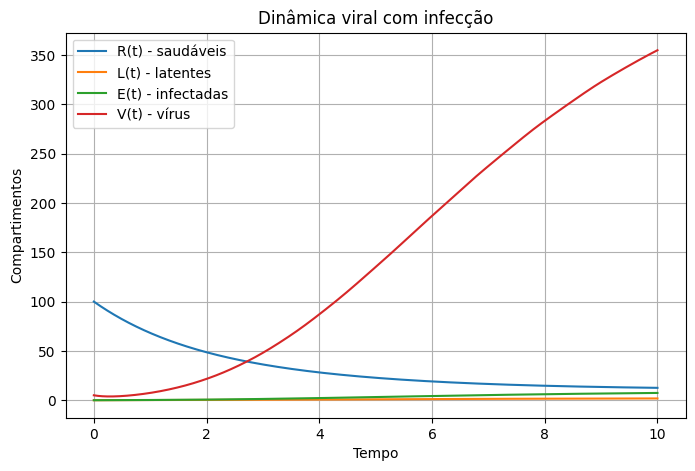

In [63]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parâmetros
Gamma = 10
tau = 1
mu = 0.5
beta = 0.001
p = 0.3
alpha = 0.2
delta = 0.4
pi = 100
sigma = 2

# Equações do modelo
def virus_model(t, y):
    R, L, E, V = y
    dRdt = Gamma * tau - mu * R - beta * V * R
    dLdt = p * beta * V * R - mu * L - alpha * L
    dEdt = (1 - p) * beta * V * R + alpha * L - delta * E
    dVdt = pi * E - sigma * V
    return [dRdt, dLdt, dEdt, dVdt]

# Condições iniciais
R0 = Gamma * tau / mu   # equilíbrio teórico livre de infecção
y0 = [100, 1e-3, 1e-3, 5]
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Resolver o sistema
sol = solve_ivp(virus_model, t_span, y0, t_eval=t_eval)

# Plotar
plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0], label='R(t) - saudáveis')
plt.plot(sol.t, sol.y[1], label='L(t) - latentes')
plt.plot(sol.t, sol.y[2], label='E(t) - infectadas')
plt.plot(sol.t, sol.y[3], label='V(t) - vírus')
plt.xlabel('Tempo')
plt.ylabel('Compartimentos')
plt.legend()
plt.title('Dinâmica viral com infecção')
plt.grid(True)
plt.show()
